### Abstract:

Gun violence is a major problem across America, and no place is this more evident than in socioeconomically disparaged areas of cities. There are a number of population characteristics, including race and income, that are tied to higher incidences of gun violence, and yet these inequities persist. However, previous work has largely ignored non-fatal gun violence, and little has been done to look at spatial patterns across multiple cities. In order to best fund and design violence prevention initiatives, both macro and micro-level understandings of gun violence are desperately needed. To aid in this, I created a demo dashboard that showed the socioeconomic and demographic characteristics (aggregated at the census tract level) of nine cities, with gun violence events from 2022 overlaid. Users of the dashboard were able to toggle between cities and specific demographic values almost instantaneously. The resulting visualizations pointed to what was already partially known about socioeconomic risk factors for gun violence, but underscored the complexity and individualistic nature of GV between different cities. Once expanded to include more cities and additional population characteristics, the dashboard can help the general public better understand gun violence dynamics in their own communities, and the dashboard can be a powerful leveraging tool when working with administrators at the city, state, and even federal levels. 

### Introduction:

Gun violence is a social, economic, and public health crisis across America, especially in urban settings. Every day, an average of over 100 Americans are killed by a firearm, but the distribution of these phenomena are not equally shared across socioeconomic and ethnic demographics. For example, a 2019 study showed that Black men and boys were twenty times  more likely to die from a firearm homicide than White men and boys, and the CDC found that the gun violence rate among Latinos was increasing at a rate nearly double that of the general population (cite). Gun violence has also been linked to communities of low socioeconomic status (SES) and low educational attainment. However, largely as a result of the 1996 Dickey Amendment which prevented the CDC from using its funding to “advocate or promote gun control”, research into gun violence in the United States has been minimal over the past 20 years. Thus, our understanding of the phenomenology and spatiotemporality of gun violence is limited and causes this problem to continue unhindered.    
   
My final project was part of an ongoing effort to map gun violence outside of the bounds of this course. I was contacted earlier this year by the group Community Justice Action Fund, which works to “end gun violence in Black and Brown communities through empowerment and grassroots organizing”. Each year, they calculate a Violence Prevention Index (VPI) score for 100 American cities, ranking them based on their municipalities’ burden of gun violence as well as the strength and funding of  violence prevention initiatives. The group wanted me to create a series of maps that overlaid gun violence events (GVEs) over aggregated socioeconomic and racial characteristics.    
   
There is a substantial gap in the literature when it comes to looking at the interplay between population characteristics and gun violence across multiple cities. Many research papers have demonstrated this phenomena in the context of one city (see Barboza, 2018 and Holcomb et al. 2021)  but multi-city analyses are less frequent. Additionally, many of these past publications looked exclusively at firearm homicides because they are some of the most accessible metrics of gun violence available. However, focusing exclusively on homicides ignores the vast majority of GVEs that are nonfatal and still can cause injury and create long-lasting trauma. My work in creating this dashboard seeks to understand gun violence on the macro and micro scale, through exploring cross-city comparisons as well as zooming into local, neighborhood-level trends of gun violence. 


### Data and Preprocessing:

Because of the time and data storage constraints of this project, I decided on a subset of cities from the original 100 used for the VPI scorecards. The selected cities are as follows: Baltimore, Maryland; Memphis, Tennessee; Minneapolis, Minnesota; Omaha, Nebraska; Orlando, Florida; Paterson, New Jersey; Portland, Oregon; St. Louis, Missouri, and Washington D.C.. These nine cities are reflective of the geographic diversity of the original 100 VPI cities, and their varying sizes and populations allowed for an understanding of urban gun violence across the country.   
   
Census tracts (CTs) were chosen as the geographic unit of aggregation because they were the most granular option that also had adequate paired demographic data. CT shapefiles were downloaded from the US Census Bureau’s website. These shapefiles are publicly available and were downloaded at the state level.    
   
The extent of the selected cities - and consequently, the CTs that comprised them - was decided by overlaying CTs of each metropolitan area with city limits shapefiles. The majority of these city limits were pulled from municipalities’ GIS ‘hubs’ and were publicly available. However, many of these cities contained complex boundaries that were both hard to understand and not well suited for visualization - which was the primary objective of this dashboard. City limits were cleaned using the edit vertex features on ArcPRO, and final geometries were determined through secondary analysis of other visualization-focused depictions of boundaries. Cleaned outlines were saved and used to do a primary selection of all CTs within or touching city boundaries (using the “select by location” tool in ArcPro). To trim census tracts that were partially located within city limits, the “clip” tool in ArcPro was used, resulting in a clean and easy-to-understand subset of CTs for each of the nine selected cities. Additionally, coordinates of the rough geographic center of each of the cities were obtained using Google Maps and copied into the script as comment. This was done to establish starting points for the individual cities’ plot extents that could be modified once the shapefiles were plotted.    
   
Census-tract level data was eventually joined to the shapefiles using values pulled from the American Community Survey findings. This is a yearly, federally-administered survey that asks residents questions relating to racial and ethnic identity, household income, individual educational attainment, and more. For the purposes of this project, three data points were pulled for each of the CTs - percent Black, median household income, and proportion of the adult population (over the age of 24) that did not complete high school or earn their GED. Tracts that did not contain data for any or all of these variables were removed from analyses as to not misrepresent the data and modify overall trends.    
   
The point-level gun violence event (GVE) data was prepared and cleaned by collaborating partners at Gun Violence Archive. The website is an open-access repository of all available American GVE data over the past 10 years, and includes details such as location (latitude and longitude), date, and characteristics of the incident (some examples of characteristics include ‘gang-related’, ‘road-rage’, and ‘accidental firearm discharge’).  The original file we received contained all GVEs from 2022 in the 100 cities selected for the 2023 CVI scorecard. Because my project was only exploring 9 cities, I created a shortened version (omitting any cities I wasn’t using for this project) of the original csv to increase processing speeds.   



### Methods:

Once the CTs for each city were cleaned and downloaded into individual shapefiles, the “append” tool in ArcPRO was used to concatenate the tracts into one file. A spatial join was performed after the file containing pertinent demographic information was uploaded into the ArcPRO workspace as a csv. The final joined shapefile was then downloaded and pulled into the jupyterlab notebook interface, along with the trimmed point-level GSE file (a csv). Relevant packages were imported into the workspace, including geopandas, pandas, IPYthon, ipywidgets, and folium   
   
The first chunk of code imported the CT shapefile using geopandas, and some of the joined demographic columns were renamed for clarity. Additionally, the point-level GSE csv was read in using pandas, and converted to a geodataframe using the longitude and latitude columns to build the geometries. After checking the CRS of each of these geodataframes, an incongruency was revealed and consequently the point-data geodataframe was converted into EPSG 4269 to match   
   
Next, the two main functions of the maps were scripted - the extent, which would change the minimum and maximum x and y values on the plot to show specific cities, and the layer, which would swap between choropleths of the different CT-aggregated demographic characteristics. This was accomplished through conditional statements using if/elif/else. Extents were linked to city titles (i.e. “Baltimore”), and layers were linked to the column of interest (i.e. “Percent Black”) and given unique color schemes to differentiate them. The arguments for extent and layer were toggled with added radio-button widgets, which would modify these features depending on the user input. Finally, the output of these two variables was layered with the point-level GSE geodataframe. The exact x and y minimums and maximums were adjusted after demoing the dashboard multiple times, and the GSE point size was modified from city to city depending on the city’s total area and the total number of GSEs present. This latter modification helped to improve visualization substantially. The code for the dashboard is shown below. 


In [5]:
import pandas as pd
import geopandas as gpd
from IPython.display import display,clear_output
import ipywidgets as widgets
import numpy

pd.options.display.max_columns = None
points=pd.read_csv(r"updated_shootings.csv")
geopoints= gpd.GeoDataFrame(points, geometry=gpd.points_from_xy(points.Longitude, points.Latitude))
geopoints=geopoints.set_crs('EPSG:4269')
tractsgeo=gpd.read_file(r"updated/First_Cities_Valid.shp")
tractsgeo=tractsgeo.rename(columns={'Prop_25and':'NoHS25up'})
tractsgeo=tractsgeo.rename(columns={'Household_':'HH_MedInc'})
tractsgeo=tractsgeo.rename(columns={'Prop_OneRa':'Prop_Black'})


def changeExtent(change):
    redraw()
   
def redraw():
    currentextent = extent.value
    if currentextent == 'Baltimore': 
        xlim = [-76.73272935051636, -76.50639000700211]
        ylim = [39.19502626604684, 39.379891341213515]
        size=5
        lnwdth=0.1
    elif currentextent == 'Memphis':
        xlim = [-90.2128118829651, -89.70668079222066]
        ylim = [34.95989132952497, 35.30195410621465]
        size=5
        lnwdth=0.1
    elif currentextent == 'Minneapolis':
        xlim = [-93.35, -93.17734120984376]
        ylim = [44.87892234635988, 45.05852437268206]
        size=5
        lnwdth=0.1
    elif currentextent == 'Omaha':
        xlim = [-96.28, -95.85]
        ylim = [41.18615874616351, 41.36]
        size=5
        lnwdth=0.1
    elif currentextent == 'Orlando':
        xlim = [-81.51220138858697, -81.27]
        ylim = [28.42, 28.63]
        size=5
        lnwdth=0.1
    elif currentextent == 'Paterson':
        xlim = [-74.21, -74.12]
        ylim = [40.88, 40.945]
        size=5
        lnwdth=0.1
    elif currentextent == 'Portland':
        xlim = [-122.85, -122.45]
        ylim = [45.40, 45.66]
        size=5
        lnwdth=0.1
    elif currentextent == 'St. Louis':
        xlim = [-90.33, -90.16]
        ylim = [38.52, 38.78]
        size=5
        lnwdth=0.1
    else:
        xlim = [-77.13, -76.90]
        ylim = [38.79, 39.00]
        size=5
        lnwdth=0.1
        
     #get the current selected layer
    selectedLayer = layer.value
    if selectedLayer == "Percent Black":
        column = 'Prop_Black'
        cmap = 'Purples'
        color = 'lime'
        alp = 1
    elif selectedLayer == "Household Median Income":
        column = 'HH_MedInc'
        cmap = 'Greens'
        color = 'black'
        alp = 1
    else:
        column = 'NoHS25up'
        cmap = 'GnBu'
        color = 'black'
        alp = 1
    with out:
        clear_output(wait=True)
        output=tractsgeo.plot(column=column, cmap=cmap, legend=True)
        geopoints.plot(markersize=8, ax=output, color=color, alpha=alp, edgecolor='black', linewidth=lnwdth)
        output.set_xlim(xlim)
        output.set_ylim(ylim)
        output.set_axis_off()
        display(output.get_figure())
       
def changeLayer(change):
    redraw()

layer=widgets.RadioButtons(
    options=['Percent Black','Household Median Income','Proportion 25 and Up Without GED'],
    description='Demographic:',
    disabled=False,
    value=None,
    layout=widgets.Layout(width='100%')
)
       
extent=widgets.RadioButtons(
    options=['Baltimore','Memphis', 'Minneapolis', 'Omaha', 'Orlando', 'Paterson', 'Portland', 'St. Louis', 'Washington DC'],
    description='City:',
    disabled=False,
    value='Baltimore',
    layout=widgets.Layout(width='100%')
)
       
layer.observe(changeLayer, names='value')
extent.observe(changeExtent, names='value')
vbox=widgets.VBox([layer, extent])
out = widgets.Output(layout=widgets.Layout(width='50%'))
allWidgets = widgets.HBox([vbox,out])
display(allWidgets)

### Results and Discussion:

The results of the dashboard were largely what previous literature had expected, but unexpected findings highlighted both the complexity of the phenomenon of gun violence and some underlying kinks in my methodology. As was expected, there were dramatic differences in the incidence of GVEs between communities of different socioeconomic statuses, educational backgrounds, and racial makeups. Perhaps nowhere is this more evident than Washington D.C, where a nearly clear-cut line divides the richer, whiter neighborhoods around Georgetown and the poorer communities of color in the city’s eastern and southern areas. 

NameError: name 'lnwdth' is not defined

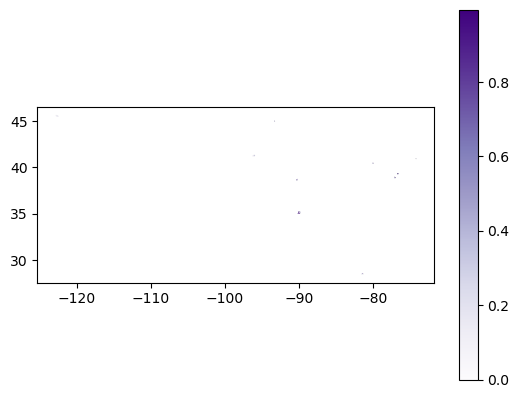

In [6]:
xlim = [-77.13, -76.90]
ylim = [38.79, 39.00]
column = 'Prop_Black'
cmap = 'Purples'
color = 'lime'
alp = 1

output=tractsgeo.plot(column=column, cmap=cmap, legend=True)
geopoints.plot(markersize=8, ax=output, color=color, alpha=alp, edgecolor='black', linewidth=lnwdth)
output.set_xlim(xlim)
output.set_ylim(ylim)
output.set_axis_off()

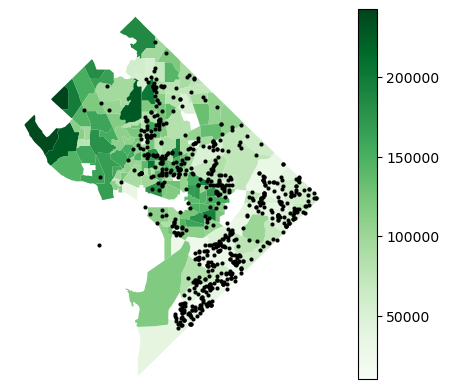

In [9]:
xlim = [-77.13, -76.90]
lnwdth=0.1
ylim = [38.79, 39.00]
column = 'HH_MedInc'
cmap = 'Greens'
color = 'black'
alp = 1

output=tractsgeo.plot(column=column, cmap=cmap, legend=True)
geopoints.plot(markersize=8, ax=output, color=color, alpha=alp, edgecolor='black', linewidth=lnwdth)
output.set_xlim(xlim)
output.set_ylim(ylim)
output.set_axis_off()

However, the methodology of using a single choropleth map for all of the cities and then zooming in on them had some drawbacks. The wide range of values for topics such as Percent Black stretched out the choropleth from 0 to 100. As a result, cities that didn’t have a dramatic range - but still had differences from zip code to zip code - looked more homogenous than we would’ve liked. One of the better examples of this is seen in Portland, as the areas where gun violence is occuring doesn’t have an dramatically different racial makeup than the rest of the city. This is shown below. 

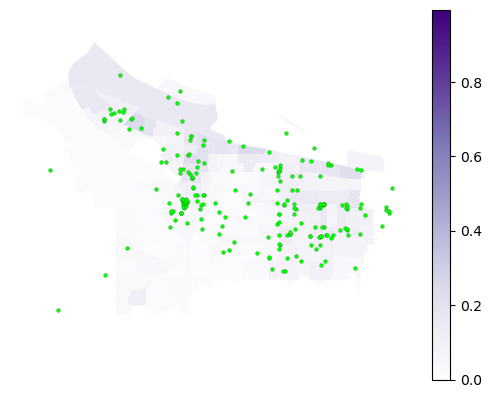

In [10]:
xlim = [-122.85, -122.45]
ylim = [45.40, 45.66]
size=5
lnwdth=0.1
column = 'Prop_Black'
cmap = 'Purples'
color = 'lime'
alp = 1

output=tractsgeo.plot(column=column, cmap=cmap, legend=True)
geopoints.plot(markersize=8, ax=output, color=color, alpha=alp, edgecolor='black', linewidth=lnwdth)
output.set_xlim(xlim)
output.set_ylim(ylim)
output.set_axis_off()

The results of these maps also point to the fact that not all of these demographic characteristics correlated with each other, or with gun violence in general. While racial makeup is not a strong predictor of gun violence in cities like Portland, median household income is much more varied between areas of low and high gun violence burden, demonstrating the complexity of the issue.  

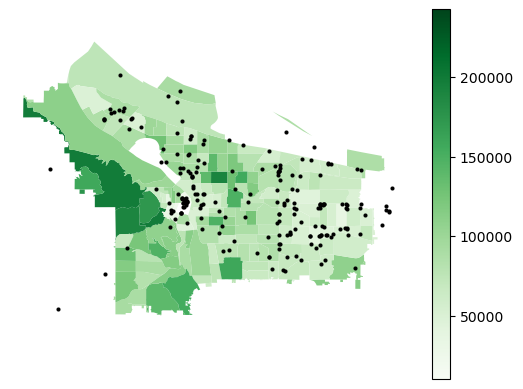

In [11]:
xlim = [-122.85, -122.45]
ylim = [45.40, 45.66]
size=5
lnwdth=0.1
column = 'HH_MedInc'
cmap = 'Greens'
color = 'black'
alp = 1

output=tractsgeo.plot(column=column, cmap=cmap, legend=True)
geopoints.plot(markersize=8, ax=output, color=color, alpha=alp, edgecolor='black', linewidth=lnwdth)
output.set_xlim(xlim)
output.set_ylim(ylim)
output.set_axis_off()

While creating individual choropleth gradients for each city could help to emphasize these differences, it does prevent downstream city-to-city comparisons (as the gradients and their corresponding values would be different).    
   
Going forward, I hope to add the rest of the 100 VPI scorecard cities to the dashboard. The major hurdle in doing this lies in the tedious and time-consuming process of cleaning city limits and pulling the specific CTs that lay within them, but I anticipate that I should still be able to meet my mid-June goal of finishing the dashboard. Additionally, I will be communicating with others on the VPI team about what other variables and demographics they would like to see explored at the CT level, such as percent hispanic or latino. As discussed previously, hispanic communities experience higher levels of GV than white communities, and while I have this data prepared, it is not yet included in the dashboard. Adding this would help to underscore disparities in cities where the most economically and socially disadvantaged neighborhoods are primarily hispanic (as opposed to black), such as those along the US-Mexico border and certain enclaves of New York City. Finally, I would like to design a copy of the dashboard that allows for the same city to be displayed with GVEs in three separate panels, with each panel showing a different demographic CT choropleth map. This would allow for an understanding of how overlapping these areas of socioeconomic and racial characteristics overlap, and emphasize that GV prevention requires a multifaceted and multidisciplinary approach.


### Conclusion:

The dashboard I have created makes information about population characteristics of specified geographies and GVE information visible in a simple, streamlined fashion. While past research has looked at socieconomic inequalities in gun violence, my dashboard shows the spatial dynamics of these inequalities and frames them in a way that is highly specific to each city. In building this tool, I have made it possible for those with the power to reduce gun violece the ability to see it more clearly than before, which will hopefully lead to concrete steps towards reducing America's gun violenc epidemic. 

### References:

Barboza G. A Secondary Spatial Analysis of Gun Violence near Boston Schools: a Public Health Approach. J Urban Health. 2018;95(3):344-360. doi:10.1007/s11524-018-0244-8   
   
Levine, N., Drake, S. A., Reynolds, T. F., Yang, Y., Wolf, D. A., Persse, D., Wade, C. E., & Holcomb, J. B. (2021). Spatial Correlates of Gun Deaths in Harris County, Texas. Homicide Studies, 25(1), 37–60. https://doi.org/10.1177/1088767920924448
